In [10]:
import pmdarima as pm
import pandas as pd
import numpy as np
from pmdarima import model_selection
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from statsmodels.tsa.stattools import acf, pacf, adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import numpy as np

In [11]:
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [12]:
data = pd.read_excel('data.xlsx', index_col=0)
data.head()

,Yield,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
Year,,,,,,,,,,,,,,,,,,,,,
2004,220,67576.2700,30445.530,154.9500,20.2,16.0,8.7,4.2,3.2,2.7,...,0.1,23.1,36.1,64.4,138.8,92.0,3.2,51.6,27.3,29.2
2005,291,65453.6900,28306.070,330.2200,20.7,16.5,8.5,2.6,3.3,2.8,...,28.1,3.4,187.7,7.8,64.4,69.5,23.1,25.2,9.9,31.3
2006,296,70153.3800,31615.415,167.3100,19.8,13.2,7.0,6.1,1.6,3.8,...,28.1,17.4,54.4,39.6,99.4,58.5,6.2,81.1,17.4,0.3
2007,324,84170.3325,30741.160,896.1200,21.0,16.0,7.4,2.7,1.4,4.0,...,28.1,42.5,26.2,23.3,57.5,93.2,56.6,49.2,8.8,0.8
2008,279,79907.5678,20778.590,1104.0722,22.0,16.5,8.6,3.6,0.0,2.2,...,28.1,25.9,15.4,45.6,57.1,28.3,12.4,1.8,26.7,8.6


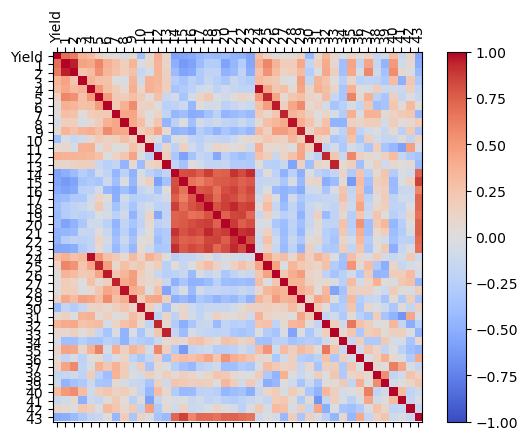

In [13]:
corr = data.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
plt.show()

On this example, when there is no correlation between 2 variables (when correlation is 0 or near 0) the color is gray. The darkest red means there is a perfect positive correlation, while the darkest blue means there is a perfect negative correlation.

In [14]:
corr

,Yield,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
Yield,1.000000,0.682053,0.630743,0.346061,0.311173,0.127596,0.027761,0.000234,-0.056622,0.052505,...,-0.050603,0.117174,0.047279,0.123860,-0.155239,-0.094095,0.298789,-0.140469,0.106992,-0.539219
1,0.682053,1.000000,0.951011,0.448138,0.419176,0.586904,0.381119,0.288796,0.163733,0.348210,...,-0.386407,0.444432,-0.172062,0.439349,-0.160810,-0.456193,0.493194,-0.085882,0.061223,-0.505392
2,0.630743,0.951011,1.000000,0.237814,0.308711,0.540345,0.340059,0.259676,0.164324,0.260025,...,-0.375640,0.414905,-0.047553,0.575631,-0.095777,-0.365474,0.556315,0.068461,-0.021414,-0.421092
3,0.346061,0.448138,0.237814,1.000000,0.354888,0.277316,0.266534,0.002638,-0.053105,0.350124,...,-0.255344,0.094028,-0.211264,-0.191917,-0.195955,-0.308452,0.295299,-0.490690,0.217167,-0.307406
4,0.311173,0.419176,0.308711,0.354888,1.000000,0.495160,0.281457,0.185141,0.058639,0.390544,...,-0.340523,0.370370,0.001285,-0.043842,0.182988,-0.121207,-0.099304,-0.123875,0.155546,-0.184790
5,0.127596,0.586904,0.540345,0.277316,0.495160,1.000000,0.484071,0.205293,0.178032,0.288649,...,-0.342035,0.605859,0.060264,0.370338,-0.221989,-0.338886,0.169444,-0.155601,-0.029084,-0.144288
6,0.027761,0.381119,0.340059,0.266534,0.281457,0.484071,1.000000,0.198008,0.373326,0.562735,...,-0.235604,-0.059364,-0.177683,0.218915,-0.394809,-0.346795,0.234369,0.025965,0.318307,0.009727
7,0.000234,0.288796,0.259676,0.002638,0.185141,0.205293,0.198008,1.000000,0.423397,0.436325,...,-0.275938,0.383572,-0.032260,0.364554,0.355157,0.052018,0.126206,0.196475,0.233210,-0.440567
8,-0.056622,0.163733,0.164324,-0.053105,0.058639,0.178032,0.373326,0.423397,1.000000,0.410719,...,-0.462565,0.139380,0.119554,0.183997,0.175465,-0.061402,0.174837,0.038712,0.068186,0.181475
9,0.052505,0.348210,0.260025,0.350124,0.390544,0.288649,0.562735,0.436325,0.410719,1.000000,...,-0.215361,0.347056,-0.203118,-0.091363,-0.019606,-0.135295,0.062269,-0.239470,0.195196,-0.328821


In [15]:
import pmdarima as pm


In [16]:
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import MinMaxScaler
df = pd.DataFrame()

def check_stationarity(series, signif=0.05, name='', verbose=False):
    

    result = adfuller(series.values)
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")
        
def normalize(column):
    scaler = MinMaxScaler()
    data = column.to_numpy()
    data = data.reshape(-1, 1)
    scaler.fit(data)
    return scaler.transform(data)

In [17]:
for name, column in data.iteritems():
    check_stationarity(column, name=column.name)
    print('\n')

C:\Users\Cevher\AppData\Local\Temp\ipykernel_412\1473793550.py:1: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, column in data.iteritems():


    Augmented Dickey-Fuller Test on "Yield" 
    -----------------------------------------------
ADF Statistic: -2.476960
p-value: 0.121181
Critical Values:
	1%: -3.889
	5%: -3.054
	10%: -2.667
Non-stationary


    Augmented Dickey-Fuller Test on "1" 
    -----------------------------------------------
ADF Statistic: 2.106994
p-value: 0.998797
Critical Values:
	1%: -4.138
	5%: -3.155
	10%: -2.714
Non-stationary


    Augmented Dickey-Fuller Test on "2" 
    -----------------------------------------------
ADF Statistic: 1.391902
p-value: 0.997077
Critical Values:
	1%: -3.964
	5%: -3.085
	10%: -2.682
Non-stationary


    Augmented Dickey-Fuller Test on "3" 
    -----------------------------------------------
ADF Statistic: 0.070761
p-value: 0.964007
Critical Values:
	1%: -4.223
	5%: -3.189
	10%: -2.730
Non-stationary


    Augmented Dickey-Fuller Test on "4" 
    -----------------------------------------------
ADF Statistic: 1.267565
p-value: 0.996421
Critical Values:
	1%: -4.223
	5%: -3

In [18]:
data = data.diff(1)
data = data.dropna()
data.head()


,Yield,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
Year,,,,,,,,,,,,,,,,,,,,,
2005,71.0,-2122.5800,-2139.4600,175.2700,0.5,0.5,-0.2,-1.6,0.1,0.1,...,28.0,-19.7,151.6,-56.6,-74.4,-22.5,19.9,-26.4,-17.4,2.1
2006,5.0,4699.6900,3309.3450,-162.9100,-0.9,-3.3,-1.5,3.5,-1.7,1.0,...,0.0,14.0,-133.3,31.8,35.0,-11.0,-16.9,55.9,7.5,-31.0
2007,28.0,14016.9525,-874.2550,728.8100,1.2,2.8,0.4,-3.4,-0.2,0.2,...,0.0,25.1,-28.2,-16.3,-41.9,34.7,50.4,-31.9,-8.6,0.5
2008,-45.0,-4262.7647,-9962.5700,207.9522,1.0,0.5,1.2,0.9,-1.4,-1.8,...,0.0,-16.6,-10.8,22.3,-0.4,-64.9,-44.2,-47.4,17.9,7.8
2009,33.0,15142.8523,16040.8985,-886.8750,-1.7,-1.1,1.4,-0.1,1.9,2.5,...,55.1,-3.4,19.9,-7.9,-27.3,26.2,42.9,47.0,-22.0,0.6


In [19]:
for name, column in data.iteritems():
    check_stationarity(column, name=column.name)
    print('\n')

C:\Users\Cevher\AppData\Local\Temp\ipykernel_412\1473793550.py:1: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, column in data.iteritems():


    Augmented Dickey-Fuller Test on "Yield" 
    -----------------------------------------------
ADF Statistic: -20.990093
p-value: 0.000000
Critical Values:
	1%: -4.332
	5%: -3.233
	10%: -2.749
Stationary


    Augmented Dickey-Fuller Test on "1" 
    -----------------------------------------------
ADF Statistic: 0.784052
p-value: 0.991374
Critical Values:
	1%: -4.332
	5%: -3.233
	10%: -2.749
Non-stationary


    Augmented Dickey-Fuller Test on "2" 
    -----------------------------------------------
ADF Statistic: -1.331654
p-value: 0.614569
Critical Values:
	1%: -4.138
	5%: -3.155
	10%: -2.714
Non-stationary


    Augmented Dickey-Fuller Test on "3" 
    -----------------------------------------------
ADF Statistic: -35.719515
p-value: 0.000000
Critical Values:
	1%: -4.332
	5%: -3.233
	10%: -2.749
Stationary


    Augmented Dickey-Fuller Test on "4" 
    -----------------------------------------------
ADF Statistic: -5.634118
p-value: 0.000001
Critical Values:
	1%: -4.012
	5%: -3.10

In [20]:
# scaler = MinMaxScaler()
# data = data['Yield'].to_numpy()
# data = data.reshape(-1, 1)
# scaler.fit(data)
# sonuc = scaler.transform(data)

for name, column in data.iteritems():
    data[name] = normalize(column)

C:\Users\Cevher\AppData\Local\Temp\ipykernel_412\4229674204.py:7: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, column in data.iteritems():


In [21]:
data.head()

,Yield,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
Year,,,,,,,,,,,,,,,,,,,,,
2005,1.000000,0.455247,0.403145,0.657396,0.540541,0.593750,0.469027,0.227848,0.426230,0.540230,...,0.79376,0.445946,1.000000,0.398822,0.061153,0.371512,0.410220,0.385498,0.284083,0.641473
2006,0.511111,0.523956,0.491902,0.448085,0.351351,0.000000,0.353982,0.873418,0.131148,0.643678,...,0.58067,0.698949,0.000000,0.572326,0.609524,0.438372,0.234479,0.763194,0.461813,0.000000
2007,0.681481,0.617793,0.423754,1.000000,0.635135,0.953125,0.522124,0.000000,0.377049,0.551724,...,0.58067,0.782282,0.368901,0.477920,0.224060,0.704070,0.555874,0.360257,0.346895,0.610465
2008,0.140741,0.433693,0.275711,0.677624,0.608108,0.593750,0.592920,0.544304,0.180328,0.321839,...,0.58067,0.469219,0.429975,0.553680,0.432080,0.125000,0.104107,0.289123,0.536046,0.751938
2009,0.718519,0.629132,0.699290,0.000000,0.243243,0.343750,0.610619,0.417722,0.721311,0.816092,...,1.00000,0.568318,0.537733,0.494406,0.297243,0.654651,0.520057,0.722350,0.251249,0.612403


In [22]:
train = data[:15]
test = data[15:]

In [23]:
arima = pm.auto_arima(train['Yield'],X=train.drop(columns=['Yield']), d=2,error_action='ignore', trace=True,
                      suppress_warnings=True, maxiter=500,m=4,stationary=False,test='adf')

# Print out summary information on the fit
print(arima.summary())
print(arima.params)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(1,1,1)[4]             : AIC=-69.522, Time=1.96 sec
 ARIMA(0,2,0)(0,1,0)[4]             : AIC=-88.643, Time=2.54 sec
 ARIMA(1,2,0)(1,1,0)[4]             : AIC=-48.372, Time=2.33 sec
 ARIMA(0,2,1)(0,1,1)[4]             : AIC=92.000, Time=0.07 sec


C:\Users\Cevher\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(0,2,0)(1,1,0)[4]             : AIC=-73.665, Time=3.37 sec
 ARIMA(0,2,0)(0,1,1)[4]             : AIC=-74.082, Time=2.71 sec
 ARIMA(0,2,0)(1,1,1)[4]             : AIC=-69.113, Time=2.35 sec
 ARIMA(1,2,0)(0,1,0)[4]             : AIC=-54.797, Time=6.41 sec
 ARIMA(0,2,1)(0,1,0)[4]             : AIC=90.000, Time=0.07 sec
 ARIMA(1,2,1)(0,1,0)[4]             : AIC=-75.552, Time=2.04 sec
 ARIMA(0,2,0)(0,1,0)[4] intercept   : AIC=-73.875, Time=3.17 sec

Best model:  ARIMA(0,2,0)(0,1,0)[4]          
Total fit time: 27.075 seconds
                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                   15
Model:             SARIMAX(0, 2, 0)x(0, 1, 0, 4)   Log Likelihood                  88.321
Date:                           Sat, 24 Jun 2023   AIC                            -88.643
Time:                                   15:12:23   BIC                            -79.965
Sample:           

In [24]:
pred=arima.predict(n_periods=3, X=test.drop(columns=['Yield']), alpha=0.05)
pred

C:\Users\Cevher\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


15   -0.202261
16    0.668973
17    0.252517
dtype: float64

In [25]:
test

,Yield,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
Year,,,,,,,,,,,,,,,,,,,,,
2020,0.948148,0.957900,0.638690,0.384074,0.324324,0.593750,0.522124,0.417722,0.442623,0.356322,...,0.565449,0.636637,0.117234,0.546222,0.249123,0.155233,0.000478,0.373107,0.635261,0.436047
2021,0.585185,0.419863,0.303945,0.931203,0.864865,0.593750,0.460177,0.354430,0.590164,0.793103,...,0.579148,0.866366,0.740260,0.000000,0.428571,0.440116,0.042502,0.195044,0.148465,0.598837
2022,0.096296,0.156542,0.256712,0.781886,0.027027,0.265625,0.637168,0.329114,0.081967,0.597701,...,0.580670,0.000000,0.221130,0.509715,0.348371,0.488953,0.494747,0.513079,1.000000,0.598837


In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error


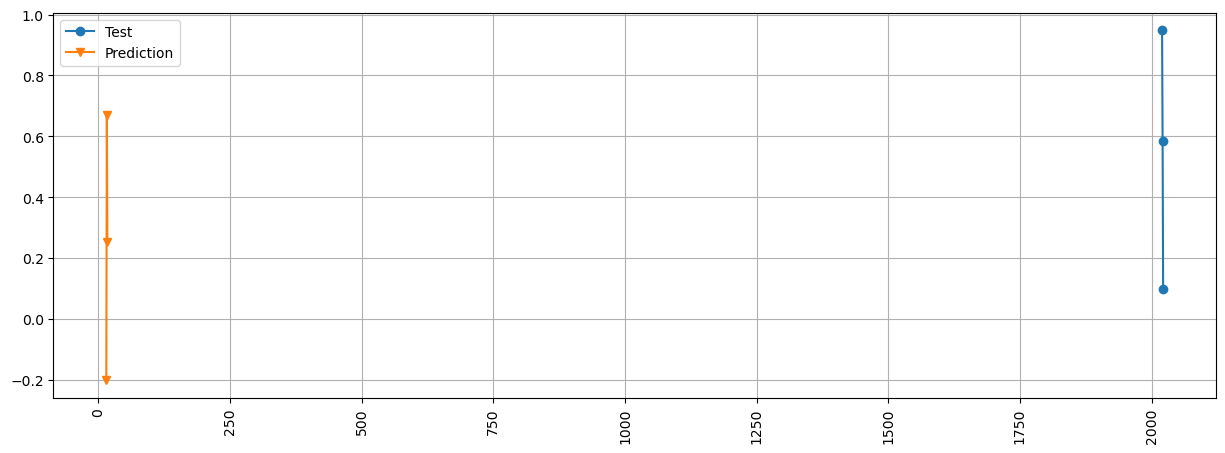

Mean Absolute  Error 0.4634723417743567
Mean Squared Error 0.451621964870952
RMSE 0.6720282470781657
AIC values -88.64292683129366


In [27]:
plt.figure(figsize=(15,5))
plt.grid()
#plt.plot(data['Period'][:-10], train['GDP_GROWTH'], marker='o', label='Train')
plt.plot(test['Yield'], marker='o', label='Test')
plt.plot(pred, marker='v', label='Prediction')
plt.legend()
plt.xticks(rotation=90)
plt.show()
print("="*50)
print("="*50)
mape=mean_absolute_error(test['Yield'], pred)
print("Mean Absolute  Error", mape)
print("="*50)
mse=mean_squared_error(test['Yield'], pred)
print("Mean Squared Error",mse)
print("="*50)
print("RMSE", (mse)**0.5)
print("="*50)
print("AIC values {}".format(arima.aic()))
print("="*50)
print("="*50)
print("="*50)
print("="*50)
